In [2]:
# # imports

# import numpy as np
# import os, glob
# import pandas as pd
# import numpy as np
# from sklearn.utils import shuffle
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# # 

In [9]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image
# %matplotlib inline

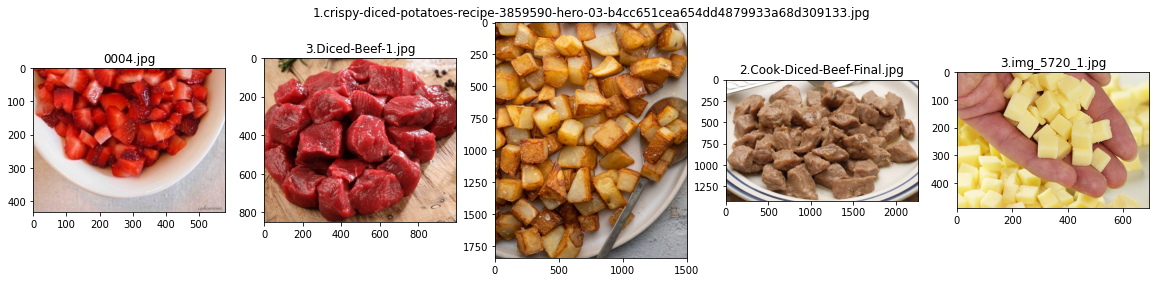

In [10]:
img_folder = 'train/diced/'

plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [11]:
# creating the dataset

# https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
# based on ^^^

# normalize,with tensorflow 
# tf.img std
# ideal size of images
IMG_WIDTH=224
IMG_HEIGHT=224
img_folder = 'train/'


def create_dataset(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name

# extract the image array and class name
PIL_img_data, class_name=create_dataset(img_folder)

target_dict={k: v for v, k in enumerate(np.unique(class_name))}

print(target_dict, len(PIL_img_data))


{'creamy_paste': 0, 'diced': 1, 'floured': 2, 'grated': 3, 'juiced': 4, 'jullienne': 5, 'mixed': 6, 'other': 7, 'peeled': 8, 'sliced': 9, 'whole': 10} 198


In [12]:
target_dict= {k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
print(len(target_val))

198


In [13]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(11)
        ])
model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    x=tf.cast(np.array(PIL_img_data), tf.float64), 
    y=tf.cast(list(map(int,target_val)),
     tf.int32), 
    epochs=5)


Epoch 1/5
7/7 [==============================] - 1s 98ms/step - loss: 4.1043 - accuracy: 0.0758
Epoch 2/5
7/7 [==============================] - 1s 97ms/step - loss: 2.3979 - accuracy: 0.0909
Epoch 3/5
7/7 [==============================] - 1s 97ms/step - loss: 2.3979 - accuracy: 0.0909
Epoch 4/5
7/7 [==============================] - 1s 94ms/step - loss: 2.3979 - accuracy: 0.0909
Epoch 5/5
7/7 [==============================] - 1s 89ms/step - loss: 2.3979 - accuracy: 0.0909
